Final System and evalaution.

In [3]:
#import feature frames

import pandas as pd

x = 'Wikipedia'

wikipedia_test_data = pd.read_pickle('All_features/'+x+'_Dev_pp.pkl')
wikipedia_training_data = pd.read_pickle('All_features/'+x+'_Train_pp.pkl')
wikipedia_test_data.name = x
wikipedia_training_data.name = x

x = 'News'

news_test_data = pd.read_pickle('All_features/' +x+ '_Dev_pp.pkl')
news_training_data = pd.read_pickle('All_features/'+x+'_Train_pp.pkl')
news_test_data.name = 'News'
news_training_data.name = 'News'

x = 'WikiNews'

wiki_test_data = pd.read_pickle('All_features/'+x+'_Dev_pp.pkl')
wiki_training_data = pd.read_pickle('All_features/'+x+'_Train_pp.pkl')
wiki_test_data.name = x
wiki_training_data.name = x

In [4]:
# Greedy approach for Multiple Word Expression in target phrase

# Apply the condition to each of the training datasets
wikipedia_training_data.loc[wikipedia_training_data['count'] > 1, 'complex_binary'] = 1
news_training_data.loc[news_training_data['count'] > 1, 'complex_binary'] = 1
wiki_training_data.loc[wiki_training_data['count'] > 1, 'complex_binary'] = 1

# Apply the same condition to the test datasets
wikipedia_test_data.loc[wikipedia_test_data['count'] > 1, 'complex_binary'] = 1
news_test_data.loc[news_test_data['count'] > 1, 'complex_binary'] = 1
wiki_test_data.loc[wiki_test_data['count'] > 1, 'complex_binary'] = 1


In [7]:
lexicon = pd.read_table('corpus/lexicon.tsv', delim_whitespace=True, names=('phrase', 'score'))

In [8]:
lexicon['phrase'] = lexicon['phrase'].apply(lambda x: str(x).lower())

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler



first_fixation = Pipeline([
                ('selector', NumberSelector(key='IA_FIRST_FIXATION_DURATION')),
                ('standard', StandardScaler())
            ])

words =  Pipeline([
                ('selector', TextSelector(key='phrase')),
                ('vect', CountVectorizer())
            ])

word_length =  Pipeline([
                ('selector', NumberSelector(key='length')),
                ('standard', StandardScaler())
            ])

dep_num =  Pipeline([
                ('selector', NumberSelector(key='dep num')),
                ('standard', StandardScaler())
            ])


tag =  Pipeline([
                ('selector', TextSelector(key='pos')),
                ('vect', CountVectorizer())
            ])

synonyms =  Pipeline([
                ('selector', NumberSelector(key='synonyms')),
                ('standard', StandardScaler())
            ])

hypernyms =  Pipeline([
                ('selector', NumberSelector(key='hypernyms')),
                ('standard', StandardScaler())
            ])

hyponyms =  Pipeline([
                ('selector', NumberSelector(key='hyponyms')),
                ('standard', StandardScaler())
            ])

syllables =  Pipeline([
                ('selector', NumberSelector(key='syllables')),
                ('standard', StandardScaler())
            ])

simple_wiki =  Pipeline([
                ('selector', NumberSelector(key='simple_wiki')),
                ('standard', StandardScaler())
            ])

ogden =  Pipeline([
                ('selector', NumberSelector(key='ogden')),
                ('standard', StandardScaler())
            ])

frequency =  Pipeline([
                ('selector', NumberSelector(key='google frequency')),
                ('standard', StandardScaler())
            ])

subimdb =  Pipeline([
                ('selector', NumberSelector(key='sub_imdb')),
                ('standard', StandardScaler())
            ])

n_gram_freq =  Pipeline([
                ('selector', NumberSelector(key='ngram freq')),
                ('standard', StandardScaler())
            ])

aoa =  Pipeline([
                ('selector', NumberSelector(key='AOA')),
                ('standard', StandardScaler())
            ])

fam =  Pipeline([
                ('selector', NumberSelector(key='FAM')),
                ('standard', StandardScaler())
            ])
img =  Pipeline([
                ('selector', NumberSelector(key='IMG')),
                ('standard', StandardScaler())
            ])
phon =  Pipeline([
                ('selector', NumberSelector(key='NPHN')),
                ('standard', StandardScaler())
            ])

score =  Pipeline([
                ('selector', NumberSelector(key='score')),
                ('standard', StandardScaler())
            ])

In [12]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline

global feats
feats = FeatureUnion([#('ff',first_fixation),
                      ('words', words),
                      ('word_length', word_length),
                      ('Tag', tag),
                      ('dep_num',dep_num),
                      ('hypernyms',hypernyms),
                      ('hyponyms',hyponyms),
                      ('synonyms', synonyms),
                      ('Syllables', syllables),
                      ('ogden',ogden),
                      ('simple_wiki', simple_wiki),
                      #('origin', origin),
                      ('freq',frequency),
                      ('subimdb', subimdb),
                      #('n_gram_freq',n_gram_freq),
                      # ('cald', cald),
                      ('AOA', aoa),
                      # ('conc', conc),
                      ('FAM', fam),
                      ('IMG', img),
                      ('NPHN', phon),
                        ('score', score)
                     ])

In [13]:

frames = [wikipedia_training_data, news_training_data, wiki_training_data]
total_training = pd.concat(frames)


frames =[wikipedia_test_data, news_test_data, wiki_test_data]
total_test = pd.concat(frames)

In [14]:

total_training = pd.merge(total_training, lexicon, on='phrase', how='left')
total_training.fillna(0.0, inplace=True)

In [15]:

total_test = pd.merge(total_test, lexicon, on='phrase', how='left')
total_test.fillna(0.0, inplace=True)

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
training_data = total_training
train_targets = training_data['complex_binary'].values
        
feature_processing = Pipeline([('feats', feats)])
feature_processing.fit_transform(training_data)
        
model = AdaBoostClassifier(n_estimators=5000, random_state=67)
pipeline = Pipeline([
    ('features',feats),
    ('classifier', model),
    ])

pipeline.fit(training_data, train_targets)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('words',
                                                 Pipeline(steps=[('selector',
                                                                  TextSelector(key='phrase')),
                                                                 ('vect',
                                                                  CountVectorizer())])),
                                                ('word_length',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='length')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('Tag',
                                                 Pipeline(steps=[('selector',
                                                                  TextSelector(key='pos')),
                                                                 ('vect',
                                                                  CountVectorizer())])),...
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='IMG')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('NPHN',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='NPHN')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('score',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='score')),
                                                                 ('standard',
                                                                  StandardScaler())]))])),
                ('classifier',
                 AdaBoostClassifier(n_estimators=5000, random_state=67))])

In [18]:
from joblib import dump
# Save the trained model to a file
dump(pipeline, 'LM/CWI_model_Final.joblib')

['LM/CWI_model_Final.joblib']

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import scipy.stats as stats


global model_stats
model_stats= pd.DataFrame(columns=['Data','Classifier','Precision','Recall','F-Score'])

def apply_algorithm(array):
 


    
        i=0
        for i, x in enumerate(array):

        # for x in array:
            
            test_data = x
            test_targets =  test_data['complex_binary'].values
            
      

            test_predictions = pipeline.predict(test_data)
                
            accuracy = accuracy_score(test_targets, test_predictions)
            precision = precision_score(test_targets, test_predictions)
            recall = recall_score(test_targets, test_predictions)
            F_Score = f1_score(test_targets, test_predictions)
               

            model_stats.loc[len(model_stats)] = [i,(str(model))[:60] ,precision, recall, F_Score]
            #baseline_accuracies(test_targets)


In [20]:
apply_algorithm([total_test]) 
model_stats

,Data,Classifier,Precision,Recall,F-Score
0,0,"AdaBoostClassifier(n_estimators=5000, random_s...",0.863201,0.853857,0.858503


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def apply_algorithm(array):
    for i, x in enumerate(array):
        test_data = x
        test_targets = test_data['complex_binary'].values

        test_predictions = pipeline.predict(test_data)

        accuracy = accuracy_score(test_targets, test_predictions)
        precision = precision_score(test_targets, test_predictions)
        recall = recall_score(test_targets, test_predictions)
        F_Score = f1_score(test_targets, test_predictions)

        model_stats.loc[len(model_stats)] = [i, (str(model))[:60], precision, recall, F_Score]

        # Generate confusion matrix and heatmap
        cm = confusion_matrix(test_targets, test_predictions)
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
        plt.xlabel("Predicted labels")
        plt.ylabel("True labels")
        plt.title("Confusion Matrix")
        plt.show()




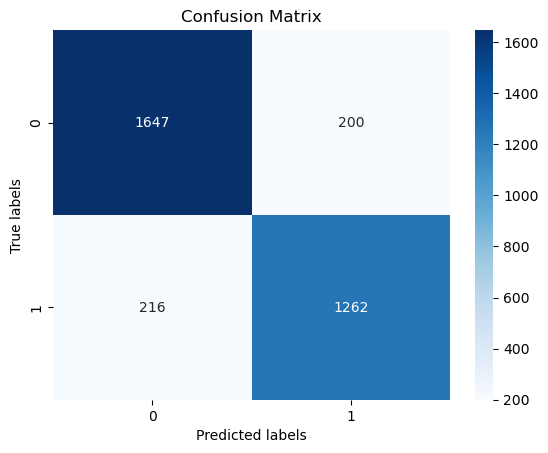

,Data,Classifier,Precision,Recall,F-Score
0,0,"AdaBoostClassifier(n_estimators=5000, random_s...",0.863201,0.853857,0.858503
1,0,"AdaBoostClassifier(n_estimators=5000, random_s...",0.863201,0.853857,0.858503


In [22]:
apply_algorithm([total_test]) 
model_stats